In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
files=!ls ../../input/feat/*fwv*rho*.parq |grep -v pca

In [3]:
files

['../../input/feat/dense_train_seq_fwvrho_offset_.parq',
 '../../input/feat/sp_train_seq_coverage_18_fwvrho_offset_.parq',
 '../../input/feat/sp_train_seq_coverage_19_fwvrho_offset_.parq',
 '../../input/feat/sp_train_seq_coverage_20_fwvrho_offset_.parq',
 '../../input/feat/sp_train_seq_coverage_21_fwvrho_offset_.parq',
 '../../input/feat/sp_train_seq_coverage_22_fwvrho_offset_.parq',
 '../../input/feat/test_fwvrho_offset_.parq',
 '../../input/feat/train_seq_coverage_18_fwvrho_offset_.parq',
 '../../input/feat/train_seq_coverage_19_fwvrho_offset_.parq',
 '../../input/feat/train_seq_coverage_20_fwvrho_offset_.parq',
 '../../input/feat/train_seq_coverage_21_fwvrho_offset_.parq',
 '../../input/feat/train_seq_coverage_22_fwvrho_offset_.parq',
 '../../input/feat/train_seq_offset_000000_fwvrho_offset_.parq',
 '../../input/feat/train_seq_offset_037500_fwvrho_offset_.parq',
 '../../input/feat/train_seq_offset_075000_fwvrho_offset_.parq',
 '../../input/feat/train_seq_offset_112500_fwvrho_offset_

In [4]:
lst1=[fastparquet.ParquetFile(u).to_pandas() for u in files ]
df1=pd.concat(lst1)
df1.shape

(1115154, 2625)

In [5]:
df1.shape

(1115154, 2625)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1115154 entries, quake_03_0200_105000 to quake_08_0161
Columns: 2625 entries, fwvrho_0 to y
dtypes: float32(2624), float64(1)
memory usage: 10.9+ GB


In [7]:
df1.head()

fwvrho_0  fwvrho_1  fwvrho_2  fwvrho_3  fwvrho_4  \
index                                                                    
quake_03_0200_105000  0.951678  0.894407  0.983638  0.963503  0.760481   
quake_06_0120_099000  0.975295  0.958465  0.969994  0.980811  0.726847   
quake_07_0296_013500  0.922614  0.871674  0.971894  0.945505  0.650792   
quake_03_0090_034500  0.746594  0.655408  0.894514  0.794383  0.692794   
quake_08_0137_055500  0.764817  0.682455  0.897923  0.807009  0.752500   

                      fwvrho_5  fwvrho_6  fwvrho_7  fwvrho_8  fwvrho_9  ...  \
index                                                                   ...   
quake_03_0200_105000  0.781685  0.926330  0.976621  0.975483  0.922405  ...   
quake_06_0120_099000  0.798822  0.976167  0.973160  0.938710  0.957831  ...   
quake_07_0296_013500  0.862322  0.906283  0.972123  0.975770  0.891411  ...   
quake_03_0090_034500  0.675419  0.709790  0.894430  0.939472  0.686523  ...   
quake_08_0137_055500  0.655620  0.726468  0.908344  0.941648  0.698114  ...   

                      fwvrho_2615  fwvrho_2616  fwvrho_2617  fwvrho_2618  \
index                                                                      
quake_03_0200_105000     0.922016     0.985957     0.834409     0.889716   
quake_06_0120_099000     0.974904     0.970385     0.848522     0.931192   
quake_07_0296_013500     0.917607     0.965082     0.726738     0.816572   
quake_03_0090_034500     0.708558     0.883283     0.635871     0.646316   
quake_08_0137_055500     0.721012     0.889197     0.688533     0.684477   

                      fwvrho_2619  fwvrho_2620  fwvrho_2621  fwvrho_2622  \
index                                                                      
quake_03_0200_105000     0.938518     0.854304     0.925984     0.964530   
quake_06_0120_099000     0.892591     0.903128     0.933314     0.933560   
quake_07_0296_013500     0.958986     0.777592     0.846792     0.894170   
quake_03_0090_034500     0.970170     0.609716     0.751785     0.848882   
quake_08_0137_055500     0.963145     0.656687     0.789889     0.875974   

                      fwvrho_2623         y  
index                                        
quake_03_0200_105000     0.893425  0.998098  
quake_06_0120_099000     0.934392  2.318898  
quake_07_0296_013500     0.825332  4.532197  
quake_03_0090_034500     0.656030  5.302996  
quake_08_0137_055500     0.698707  2.514399  

[5 rows x 2625 columns]

In [8]:
X=df1.drop('y',axis=1).values
X.shape

(1115154, 2624)

In [9]:
import numpy as np
from sklearn.decomposition import PCA

In [10]:
n_components=10
pca = PCA(n_components=n_components, svd_solver='randomized')

In [11]:
%%time
pca.fit(X)
print(np.sum(pca.explained_variance_ratio_)  )
print(pca.explained_variance_ratio_)  

0.9999273808309257
[7.30156755e-01 2.25986945e-01 4.27184117e-02 6.92525489e-04
 2.39443570e-04 4.36934809e-05 3.29155605e-05 2.24205266e-05
 1.86358004e-05 1.56343858e-05]
CPU times: user 1min 46s, sys: 6.94 s, total: 1min 53s
Wall time: 43.7 s


In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

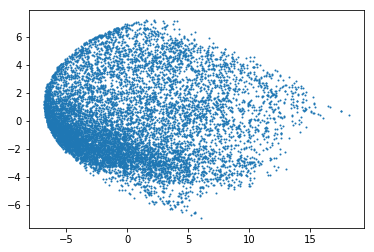

In [13]:
a=pca.transform(X[np.random.permutation(range(len(X)))[:10000]])
plt.scatter(a[:,0],a[:,1],s=1)

In [14]:
for fname in files:
    fname2=fname.replace("_fwvrho_", "_fwvrho_pca{}_".format(n_components))
    assert(fname<>fname2)
    print fname2
    adf = fastparquet.ParquetFile(fname).to_pandas()
    ax=adf.drop('y',axis=1).values
    atx = pca.transform(ax)
    adf2=pd.DataFrame(atx,index=adf.index,columns=["fwvrho_pca{}_{}".format(n_components,i) for i in range(n_components)])
    adf2['y']=adf['y']
    fastparquet.write(fname2,adf2,compression='SNAPPY')
    #break

../../input/feat/dense_train_seq_fwvrho_pca10_offset_.parq


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/fastparquet/util.py:221: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  inferred_dtype = infer_dtype(column)


../../input/feat/sp_train_seq_coverage_18_fwvrho_pca10_offset_.parq
../../input/feat/sp_train_seq_coverage_19_fwvrho_pca10_offset_.parq
../../input/feat/sp_train_seq_coverage_20_fwvrho_pca10_offset_.parq
../../input/feat/sp_train_seq_coverage_21_fwvrho_pca10_offset_.parq
../../input/feat/sp_train_seq_coverage_22_fwvrho_pca10_offset_.parq
../../input/feat/test_fwvrho_pca10_offset_.parq
../../input/feat/train_seq_coverage_18_fwvrho_pca10_offset_.parq
../../input/feat/train_seq_coverage_19_fwvrho_pca10_offset_.parq
../../input/feat/train_seq_coverage_20_fwvrho_pca10_offset_.parq
../../input/feat/train_seq_coverage_21_fwvrho_pca10_offset_.parq
../../input/feat/train_seq_coverage_22_fwvrho_pca10_offset_.parq
../../input/feat/train_seq_offset_000000_fwvrho_pca10_offset_.parq
../../input/feat/train_seq_offset_037500_fwvrho_pca10_offset_.parq
../../input/feat/train_seq_offset_075000_fwvrho_pca10_offset_.parq
../../input/feat/train_seq_offset_112500_fwvrho_pca10_offset_.parq


In [15]:
fname

'../../input/feat/train_seq_offset_112500_fwvrho_offset_.parq'